[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/CV/blob/main/data_augmentation/ae/ae_cnn_residual.ipynb)


In [23]:
import torch
import cv2
import torchvision
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from torch.optim import Adam
from matplotlib import pyplot as plt

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [25]:
!git clone https://github.com/khetansarvesh/CV.git

fatal: destination path 'CV' already exists and is not an empty directory.


# **Dataset**

In [26]:
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [27]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Define the transformation to normalize the data between 1 and -1 (mean = 0.5 and variance = 0.5 will transform to values between 1 and -1)
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True) # downloading the MNIST train dataset and then applying some transformations
mnist_loader = DataLoader(dataset=mnist, batch_size=64, shuffle=True, num_workers=0) # loading the downloaded dataset

# **Modelling**

In [28]:
from CV.representation_learning.residual_block_utils import ResidualBlock

In [33]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
                                      nn.Conv2d(1, 128, 3, 1, 1), nn.GroupNorm(num_groups=32, num_channels=128, eps=1e-6, affine=True),nn.ReLU(),
                                      ResidualBlock(128, 256),
                                      nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1), nn.GroupNorm(num_groups=32, num_channels=256, eps=1e-6, affine=True),nn.ReLU(),
                                      nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1), nn.GroupNorm(num_groups=32, num_channels=256, eps=1e-6, affine=True),nn.ReLU(),
                                    )

        self.middle_block = nn.Sequential(
                                            ResidualBlock(256, 256),
                                            nn.Conv2d(256, 512, 3, 1, 1), nn.GroupNorm(num_groups=32, num_channels=512, eps=1e-6, affine=True),nn.ReLU(),
                                            ResidualBlock(512, 256),
                                          )

        self.decoder = nn.Sequential(
                                      nn.ConvTranspose2d(256, 256, kernel_size=3, stride=2, padding=1, output_padding=1), nn.GroupNorm(num_groups=32, num_channels=256, eps=1e-6, affine=True),nn.ReLU(),
                                      nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1), nn.GroupNorm(num_groups=32, num_channels=128, eps=1e-6, affine=True),nn.ReLU(),
                                      ResidualBlock(128, 128),
                                      nn.Conv2d(128, 1, 3, 1, 1)
                                      )

    def forward(self, x):
        encoded = self.encoder(x)
        # print(encoded.shape)
        middle_block = self.middle_block(encoded)
        # print(middle_block.shape)
        decoded = self.decoder(middle_block)
        # print(decoded.shape)
        return decoded

# **Training**

In [34]:
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [35]:
for epoch_idx in range(20): # Run training for 10 epochs

    losses = []

    for im, _ in tqdm(mnist_loader):

        im = im.float().to(device)
        optimizer.zero_grad()

        # passing to model
        out = model(im)

        # loss calculation
        loss = nn.MSELoss()(im, out)

        # housekeeping
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    print(f'''Finished epoch:{epoch_idx+1} | KL Loss : {np.mean(losses)} ''')

100%|██████████| 938/938 [01:42<00:00,  9.13it/s]


Finished epoch:1 | KL Loss : 0.052916105133918194 


100%|██████████| 938/938 [01:42<00:00,  9.18it/s]


Finished epoch:2 | KL Loss : 0.0034093323943348154 


100%|██████████| 938/938 [01:42<00:00,  9.19it/s]


Finished epoch:3 | KL Loss : 0.0020236711723725996 


100%|██████████| 938/938 [01:42<00:00,  9.18it/s]


Finished epoch:4 | KL Loss : 0.001490627512718533 


100%|██████████| 938/938 [01:42<00:00,  9.18it/s]


Finished epoch:5 | KL Loss : 0.0010128606351026432 


100%|██████████| 938/938 [01:42<00:00,  9.18it/s]


Finished epoch:6 | KL Loss : 0.001107903546994991 


100%|██████████| 938/938 [01:41<00:00,  9.23it/s]


Finished epoch:7 | KL Loss : 0.0007025807508456606 


100%|██████████| 938/938 [01:40<00:00,  9.31it/s]


Finished epoch:8 | KL Loss : 0.003124875536873323 


100%|██████████| 938/938 [01:40<00:00,  9.29it/s]


Finished epoch:9 | KL Loss : 0.0004834396683685194 


100%|██████████| 938/938 [01:40<00:00,  9.29it/s]


Finished epoch:10 | KL Loss : 0.0004679054281194516 


100%|██████████| 938/938 [01:40<00:00,  9.32it/s]


Finished epoch:11 | KL Loss : 0.0004220378954480561 


100%|██████████| 938/938 [01:40<00:00,  9.37it/s]


Finished epoch:12 | KL Loss : 0.00035920168962210483 


100%|██████████| 938/938 [01:39<00:00,  9.43it/s]


Finished epoch:13 | KL Loss : 0.003106542221767687 


100%|██████████| 938/938 [01:38<00:00,  9.49it/s]


Finished epoch:14 | KL Loss : 0.0009378999559968801 


100%|██████████| 938/938 [01:38<00:00,  9.51it/s]


Finished epoch:15 | KL Loss : 0.00036561163644969607 


100%|██████████| 938/938 [01:38<00:00,  9.50it/s]


Finished epoch:16 | KL Loss : 0.0003202689474178374 


100%|██████████| 938/938 [01:38<00:00,  9.51it/s]


Finished epoch:17 | KL Loss : 0.00029329163794645786 


100%|██████████| 938/938 [01:38<00:00,  9.53it/s]


Finished epoch:18 | KL Loss : 0.0002868392200976573 


100%|██████████| 938/938 [01:38<00:00,  9.57it/s]


Finished epoch:19 | KL Loss : 0.0013852095731763916 


100%|██████████| 938/938 [01:37<00:00,  9.61it/s]

Finished epoch:20 | KL Loss : 0.0003146821525036496 


# **Inference**

In [36]:
# Getting 100 random indexes
idxs = torch.randint(0, len(mnist)-1, (10, ))

# using these indexes to get images from mnist dataset and concatenating them
test_ims = torch.cat([mnist[idx][0][None, :] for idx in idxs]).float()

# generating images for the above test dataset
generated_im = model(test_ims.to(device))

In [37]:
generated_im = torch.clamp(generated_im, -1., 1.).detach().cpu() # clamping the generated images
generated_im = 0.5*generated_im + 0.5 #detransforming the images from [-1,1] to [0,1]

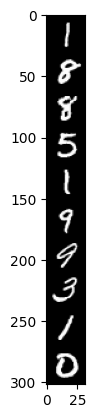

In [38]:
# now printing the predicted images
grid = torchvision.utils.make_grid(generated_im, nrow=1)
img = torchvision.transforms.ToPILImage()(grid)
plt.imshow(img, cmap='gray')